Train Shape: (891, 12)
Test Shape: (418, 11)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0  

C:\Users\shrey\AppData\Local\Temp\ipykernel_23840\763664101.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x="Survived", palette="viridis")


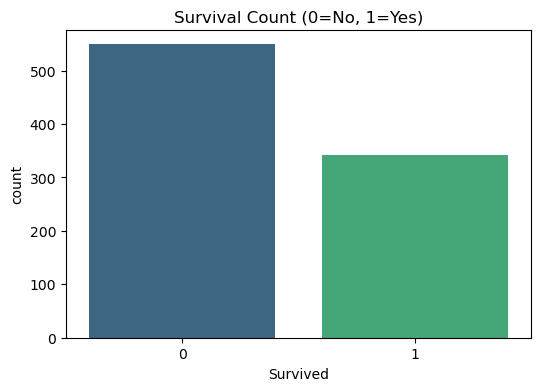

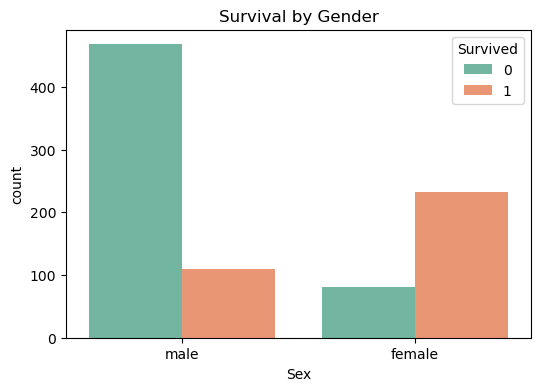

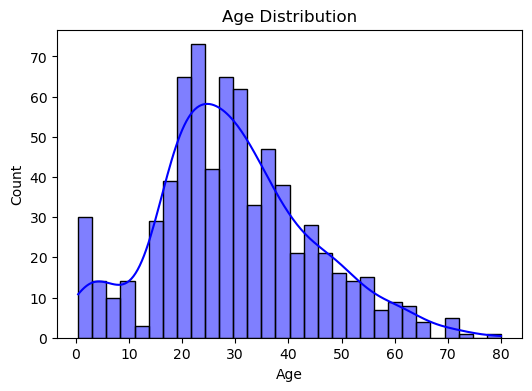

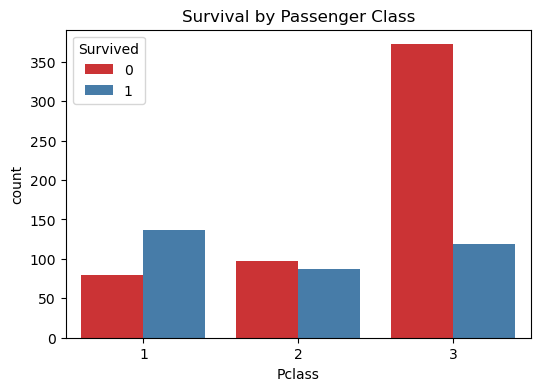

C:\Users\shrey\AppData\Local\Temp\ipykernel_23840\763664101.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].median(), inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_23840\763664101.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Logistic Regression Accuracy: 0.8044692737430168
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Random Forest Accuracy: 0.8100558659217877
[[89 16]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



C:\Users\shrey\AppData\Local\Temp\ipykernel_23840\763664101.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette="coolwarm")


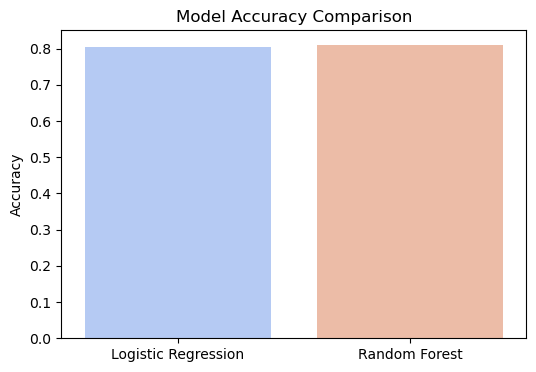


Submission file created: submission.csv

 All graphs saved (PNG) and submission.csv generated.


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x600 with 0 Axes>

In [7]:
# =============================
# 1. Import Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# =============================
# 2. Load Dataset
# =============================
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print(train.head())

# =============================
# 3. Exploratory Data Analysis (EDA)
# =============================
plt.figure(figsize=(6,4))
sns.countplot(data=train, x="Survived", palette="viridis")
plt.title("Survival Count (0=No, 1=Yes)")
plt.savefig("survival_count.png")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=train, x="Sex", hue="Survived", palette="Set2")
plt.title("Survival by Gender")
plt.savefig("survival_by_gender.png")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(train["Age"].dropna(), bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.savefig("age_distribution.png")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=train, x="Pclass", hue="Survived", palette="Set1")
plt.title("Survival by Passenger Class")
plt.savefig("survival_by_class.png")
plt.show()

# =============================
# 4. Data Preprocessing
# =============================

# Fill missing values
train["Age"].fillna(train["Age"].median(), inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Fare"].fillna(test["Fare"].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
train["Sex"] = le.fit_transform(train["Sex"])
test["Sex"] = le.transform(test["Sex"])
train["Embarked"] = le.fit_transform(train["Embarked"])
test["Embarked"] = le.transform(test["Embarked"])

# Select features
X = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = train["Survived"]

# Split into train & validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_scaled = scaler.transform(test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])

# =============================
# 5. Model Training
# =============================
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

# =============================
# 6. Model Evaluation
# =============================
print("\nLogistic Regression Accuracy:", accuracy_score(y_val, y_pred_log))
print(confusion_matrix(y_val, y_pred_log))
print(classification_report(y_val, y_pred_log))

print("\nRandom Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

# Compare models
models = ["Logistic Regression", "Random Forest"]
scores = [accuracy_score(y_val, y_pred_log), accuracy_score(y_val, y_pred_rf)]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=scores, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.savefig("model_accuracy.png")
plt.show()

# =============================
# 7. Final Prediction for Submission
# =============================
final_predictions = rf_model.predict(test_scaled)  # Using Random Forest (better accuracy)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": final_predictions
})

submission.to_csv("submission.csv", index=False)
print("\nSubmission file created: submission.csv")

# =============================
# 8. Save Graphs for GitHub/LinkedIn
# =============================
print("\n All graphs saved (PNG) and submission.csv generated.")

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Make sure an 'images' folder exists
os.makedirs("images", exist_ok=True)

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.savefig("images/heatmap.png")  # save for README
plt.show()
